In [1]:
import numpy as np
import pandas as pd
import os

Importing reduced dataset:

In [2]:
object = pd.read_pickle('cleanedMovie.pkl')

In [3]:
movies = pd.DataFrame(object)

Pivoting data to create a Customer by Movie Matrix of ratings to use for doc term clustering:

In [4]:
movieMatrix = movies.pivot_table(values='Rating', index='CustomerID', columns='MovieID')

Dealing with missing values by calculating a better average:

In [7]:
globalavg = movieMatrix.mean().mean()
rating_sums= movieMatrix.sum(axis=0) 
rating_count = movieMatrix.count(axis=0)
missing_ratings = (rating_sums + globalavg*25) / (25+rating_count)

In [8]:
movieMatrix = movieMatrix.fillna(missing_ratings)

In [9]:
movie_arr = np.array(movieMatrix)

In [12]:
import kMeans
from sklearn.cluster import KMeans

Uncomment to check the error sum of square and determine a good K value:

In [14]:
#import matplotlib.pyplot as plt
#sse = {}
#for k in range(1, 20):
    #kmeans = KMeans(n_clusters=k).fit(movie_arr)
    #sse[k] = kmeans.inertia_

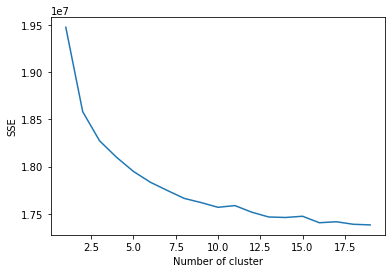

In [15]:
#plt.figure()
#plt.plot(list(sse.keys()), list(sse.values()))
#plt.xlabel("Number of cluster")
#plt.ylabel("SSE")
#plt.show()

In [116]:
#sse = {}
#for k in range(1, 10):
    #kmeans = KMeans(n_clusters=k).fit(movie_arr)
    #sse[k] = kmeans.inertia_

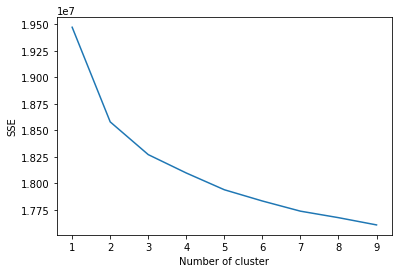

In [117]:
#plt.figure()
#plt.plot(list(sse.keys()), list(sse.values()))
#plt.xlabel("Number of cluster")
#plt.ylabel("SSE")
#plt.show()

In [105]:
kmeans = KMeans(n_clusters=10)

In [106]:
kmeans.fit(movie_arr)

KMeans(n_clusters=10)

In [107]:
kmeans.cluster_centers_

array([[3.44, 2.65, 3.32, ..., 2.81, 2.51, 2.82],
       [2.98, 2.37, 2.48, ..., 2.56, 2.41, 2.56],
       [3.45, 2.65, 3.34, ..., 2.84, 2.54, 2.83],
       ...,
       [3.46, 2.64, 3.33, ..., 2.95, 2.55, 2.88],
       [3.45, 2.65, 3.33, ..., 2.83, 2.53, 2.83],
       [3.44, 2.65, 3.36, ..., 2.82, 2.55, 2.82]])

In [108]:
kmeans.cluster_centers_[0].shape

(16795,)

In [109]:
np.set_printoptions(precision=2,suppress=True)

In [110]:
def toTitle(MovieID):
    return terms.loc[ MovieID , : ][2]

In [111]:
def top_movies(df, n):
    for mov in range(0,n):
        print(toTitle(df.index[mov]),df.loc[df.index[mov]][0] )

In [112]:
terms = pd.read_csv('movie_titles.txt', sep='\t', encoding = "ISO-8859-1", header=None, index_col=0)
terms = terms.iloc[:,:2]
terms = terms.iloc[:,1:]

In [113]:
def print_clust(kmeans, k, n):
    for cluster in range(0,k):
        clust = pd.DataFrame(kmeans.cluster_centers_[cluster])
        clust.index = movieMatrix.columns
        #print(clust)
        #sortDF = pd.DataFrame(clust,terms)
        #print(sortDF)
        sortDF = clust.sort_values(by=[0],ascending=False)
        #print(sortDF.loc[sortDF.index[0]][0])
        #print(sortDF)
        print("Top movies in Cluster", cluster+1)
        top_movies(sortDF, n)
        print("")

In [115]:
print_clust(kmeans,10,10)

Top movies in Cluster 1
Lord of the Rings: The Return of the King: Extended Edition 4.603723972558479
Lost: Season 1 4.597961319666568
The Lord of the Rings: The Fellowship of the Ring: Extended Edition 4.596407021605369
Lord of the Rings: The Two Towers: Extended Edition 4.574093004456931
Star Wars Trilogy: Bonus Material 4.466428449131808
Battlestar Galactica: Season 1 4.4564167485483965
The Simpsons: Season 6 4.414654612036479
Star Wars: Episode V: The Empire Strikes Back 4.412344588471618
The Simpsons: Season 5 4.4033992893909755
Star Wars: Episode IV: A New Hope 4.40308433650743

Top movies in Cluster 2
Lost: Season 1 4.48983823831955
Lord of the Rings: The Return of the King: Extended Edition 4.420921576047073
Battlestar Galactica: Season 1 4.379651305667706
Star Wars Trilogy: Bonus Material 4.337686089439725
The Lord of the Rings: The Fellowship of the Ring: Extended Edition 4.307883499239227
Lord of the Rings: The Two Towers: Extended Edition 4.292869331831831
Star Wars: Episod

Clustering again using 0's to fill in missing values:

In [119]:
movieMatrix = movies.pivot_table(values='Rating', index='CustomerID', columns='MovieID')
movieMatrix = movieMatrix.fillna(0)
movie_arr = np.array(movieMatrix)

In [121]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(movie_arr)

KMeans(n_clusters=10)

In [122]:
print_clust(kmeans,10,10)

Top movies in Cluster 1
Pulp Fiction 4.6249243799153055
Raiders of the Lost Ark 4.621899576527524
The Matrix 4.586206896551724
The Shawshank Redemption: Special Edition 4.561403508771929
The Usual Suspects 4.509981851179676
Lord of the Rings: The Fellowship of the Ring 4.509981851179672
Braveheart 4.483968542044767
Lord of the Rings: The Two Towers 4.464004839685421
Fight Club 4.457350272232307
The Silence of the Lambs 4.445251058681185

Top movies in Cluster 2
Raiders of the Lost Ark 4.10705596107056
Lord of the Rings: The Fellowship of the Ring 4.062449310624493
Lord of the Rings: The Two Towers 4.038118410381184
The Matrix 4.0129764801297645
Pirates of the Caribbean: The Curse of the Black Pearl 3.856447688564477
Lord of the Rings: The Return of the King 3.8280616382806163
Indiana Jones and the Last Crusade 3.8256285482562857
The Terminator 3.701540957015409
The Sixth Sense 3.6650446066504463
Star Wars: Episode V: The Empire Strikes Back 3.6553122465531227

Top movies in Cluster 3
T